In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np

# 1. 퍼셉트론 알고리즘 클래스 생성

In [ ]:
class Perceptron(object):
  '''
   eta (float 형) 학습률 : 0.0 ~ 1.0 사이
   n_iter (int) 훈련 데이터셋 반복 횟수 : epoch
   random_state (int) 가중치 무작위 초기화를 위한 난수 생성기 seed

   난수 발생을 위해서는 seed를 넘겨줘야한다.
   디버깅 등을 위해서 동일한 순서로 난수를 발생시켜야 할 경우가 있어서 seed 값에 따라 나뉜다.
  '''
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  ''' 
  훈련 데이터 학습

  X : [n_samples, n_features] -> 훈련 데이터
  y : [n_samples] -> 타깃 값

  '''
  def fit(self, X, y):
  
    rgen = np.random.RandomState(self.random_state)
    # 표준편차 : 0.01, 가중치는 0이 아니어야 학습률이 분류결과에 영향을 끼친다.
    self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))     # 각각의 가중치를 업데이트 시키는 코드
        self.w_[1:] += update * xi
        self.w_[0] += update                                 # bias
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  # 최종 입력 계산 ( predict )
  def net_input(self, X):
    # 최적화 시킨 가중와 편향을 연산해서 결과값 예측
    return np.dot(X, self.w_[1:]) + self.w_[0]

  # 최종 입력값으로 1 or -1을 predict한다.
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

# 2. 데이터 불러오기

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/flower/iris.data', header=None)
df.columns = [0,1,2,3,4]
print(df.head())
print(df.tail())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 훈련 dataset 결과값에 넣는다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# feature 0 : 꽃받침 길이
# feature 1 : 
# feature 2 : 꽃잎 길이
# feature 3 : 
# 꽃받침 길이와 꽃임 길이를 추출한다. u
# 0과 2라는 것은 0~1이 아니라 feature 0, feature 2를 말하는 것
X = df.iloc[0:100, [0, 2]].values
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

#3. setosa, versicolor의 꽃받침, 꽃잎 길이의 산점도

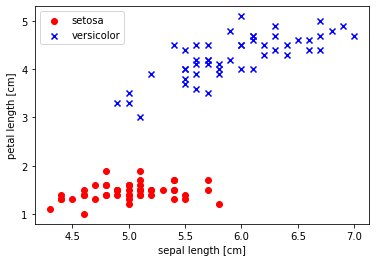

In [ ]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

- setosa 는 꽃받침, 꽃잎 길이 둘다 짧은 편에 속한다.
- versicolor 는 꽃받침, 꽃잎 길이 둘다 긴 편에 속한다.

#4. epoch에 따른 error 확인

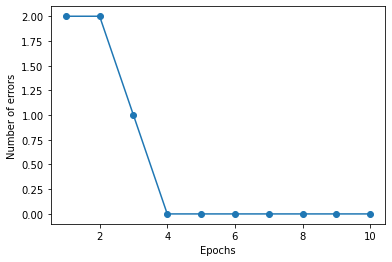

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)      # classifier
ppn.fit(X,y)                  # 가중치 업데이트
# 가중치 준비 완료
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

- 위 그래프를 보아서 epoch 4부터 error를 완벽히 잡아낸 것을 알 수 있다.

#5. 2차원 데이터셋의 결정 경계를 시각화하기

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

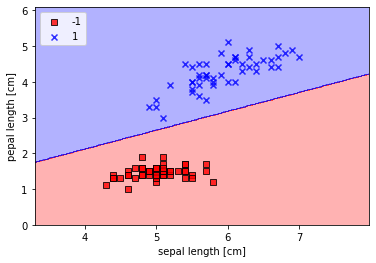

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('pepal length [cm]')
plt.legend(loc='upper left')
plt.show()